In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
train_images, test_images = train_images / 255, test_images / 255

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 60)             │        47,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,710 (186.37 KB)

 Trainable params: 47,710 (186.37 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## 7-3

In [21]:
model.fit(train_images, train_labels, epochs=30, batch_size=64)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.9986 - loss: 0.0059
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.9987 - loss: 0.0052
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9991 - loss: 0.0042
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0051
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9996 - loss: 0.0029
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.9992 - loss: 0.0038
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0058
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9992 - loss: 0.0032
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.9996 - loss: 0.0023
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0061
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 0.0020
Epoch 12/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - 447us/step - accuracy: 0.9729 - loss: 0.1773
0.9728999733924866


In [23]:
num = test_images[1]

for i in range(28) :
    for j in range(28) :
        #print(num[i][j], end = " ")
        print('{:3.0f}'.format(num[i][j] * 255), end='')
    print()

print("result :", test_labels[1])

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

'\nfor i in range(0, cnt, 1) :\n    st = test_labels[cnt * i : cnt * (i + 1)] == preds[cnt * i : cnt * (i + 1)]\n    FalseCnt += np.count_nonzero(st == False) if np.count_nonzero(st == False) == 0 else print("")\n    print(f"WRONG! {i * cnt + np.count_nonzero(st == False) + 1}")\n    #print(f"{test_labels[cnt * i : cnt * (i + 1)] == preds[cnt * i : cnt * (i + 1)]}")\n\nprint(FalseCnt)\n'

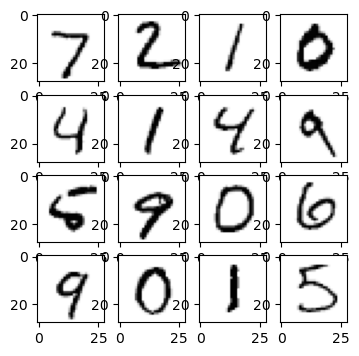

In [24]:
cnt = 4

fig = plt.figure()
plt.rcParams['figure.figsize'] = [cnt, cnt]

for i in range(0, cnt, 1) :
    for j in range(0, cnt, 1) :
        ax = fig.add_subplot(cnt, cnt, cnt * i + j + 1)
        ax.imshow(test_images[cnt * i + j], cmap="Greys")


preds = []

for i in range(0, cnt, 1) :
    for j in range(0, cnt, 1) :
        predictions = model.predict(np.array(test_images[cnt * i + j]).reshape(1, 28, 28, 1), verbose=0)
        preds.append(np.argmax(predictions))

FalseCnt = 0
"""
for i in range(0, cnt, 1) :
    st = test_labels[cnt * i : cnt * (i + 1)] == preds[cnt * i : cnt * (i + 1)]
    FalseCnt += np.count_nonzero(st == False) if np.count_nonzero(st == False) == 0 else print("")
    print(f"WRONG! {i * cnt + np.count_nonzero(st == False) + 1}")
    #print(f"{test_labels[cnt * i : cnt * (i + 1)] == preds[cnt * i : cnt * (i + 1)]}")

print(FalseCnt)
"""

In [25]:
def softmax(a) :
    expA = np.exp(a)
    sumE = np.sum(expA)
    y = expA / sumE

    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print(softmax(a))

[0.0047 0.1734 0.035  0.7773 0.0095]


## 7-4

In [26]:
b = np.array([0.4, 4.5, 1.9])

print(softmax(b))
print(np.max(softmax(b)).round(4))
print(np.argmax(b))

[0.0152 0.9167 0.0681]
0.9167
1


In [27]:
b = np.array([4.9, 2.4, 12.1, 2.5, 1.9, 0.2])
np.set_printoptions(suppress=True, precision=4)
print(softmax(b))
print(np.max(softmax(b)).round(4))
print(np.argmax(b))

[0.0007 0.0001 0.9991 0.0001 0.     0.    ]
0.9991
2


## 7-5

In [33]:
from keras.utils import to_categorical

data = ["Versicolor", "Setosa", "Virginica"]
dts = {v : k for v, k in enumerate(data)}

encoded = to_categorical(np.array(list(dts.keys())))

for i in range(len(dts)) :
    print("{:10s} : {}".format(dts[i], encoded[i]))

Versicolor : [1. 0. 0.]
Setosa     : [0. 1. 0.]
Virginica  : [0. 0. 1.]
